# Session 1 - Normal Workflows

In this tutorial we'll explore some normal workflows that require a bit more advanced use than the Hello BattMo tutorial. Within this tutorial you will:
- Learn how to create your own parameter sets
- Simulate a WLTP drive cycle to learn how to define your own parameter functions
- Implement electrode balancing to a simulation
- Investigate the influence of the reaction rate and diffusion coefficient on cell performance

Let's begin with importing BattMo and GLMakie.

In [ ]:
using BattMo, GLMakie

GLMakie.activate!(inline=true) # Plotting figures will be rendered within the notebook

## Part 1 - Create your own parameter sets

This part of the tutorial walks you through the process of creating and customizing your own cell parameter sets in BattMo.jl. Cell parameter sets define the physical and chemical properties of the battery system you're simulating. You can build them from scratch using your model setup, modify them, and save them for future use.

The difficulty with setting up your own input parameters are that it's often not very clear which parameters you need for which submodel combination. In BattMo we have created a handy system to assist you in this process and bring more clearity in the parameter-model relations. We do this by providing functions that create empty parameter sets containing the required parameters based on the user's defined model setup.

Let's get into it!

### Step 1 - Initiate a model setup

First, define the battery model configuration you'd like to use. This will serve as the template for generating your parameter set. Model settings specify the submodels that the user would like to be included within the simulation. Have a quick look into the submodels that you can configure by running the following function.

In [3]:
print_submodels_info()

ℹ️  Submodels Information
Parameter                     Options                       Documentation
--------------------------------------------------------------------------------
CurrentCollectors             Generic                       -         
SEIModel                      Bolay                         [visit](https://battmoteam.github.io/BattMo.jl/dev/manuals/user_guide/sei_model)

RampUp                        Sinusoidal                    [visit](https://battmoteam.github.io/BattMo.jl/dev/manuals/user_guide/ramp_up)

TransportInSolid              FullDiffusion                 -         
ModelFramework                P2D, P4D Pouch                [visit](https://battmoteam.github.io/BattMo.jl/dev/manuals/user_guide/pxd_model)




Let's say we'd like to setup our own cell parameter set that includes parameters for a P2D simulation including SEI growth. Then we first configure the model. We can start from the default P2D model settings.

In [4]:
model_settings = load_model_settings(; from_file_path= "default_sets/model_settings/P2D.json")

{
    "RampUp" => "Sinusoidal"
    "Metadata" =>     {
        "Description" => "Default model settings for a P2D simulation including a current ramp up, excluding current collectors and SEI effects."
        "Title" => "P2D"
    }
    "TransportInSolid" => "FullDiffusion"
    "ModelFramework" => "P2D"
}

We can see that these settings don't include the SEI model. So let's add it. We can then instantiate the lithium ion battery model setup and see if our model settings are valid.

In [7]:

model_settings["SEIModel"] = "Bolay"

model_setup = LithiumIonBattery(; model_settings)

✔️ Validation of ModelSettings passed: No issues found.
──────────────────────────────────────────────────


LithiumIonBattery("Setup object for a P2D lithium-ion model", {
    "SEIModel" => "Bolay"
    "RampUp" => "Sinusoidal"
    "Metadata" =>     {
        "Description" => "Default model settings for a P2D simulation including a current ramp up, excluding current collectors and SEI effects."
        "Title" => "P2D"
    }
    "TransportInSolid" => "FullDiffusion"
    "ModelFramework" => "P2D"
}, true)

### Step 2 - load an empty parameter set

Next, create an empty parameter dictionary based on your model setup. This will include all the required keys but without any values filled in.

In [8]:
empty_cell_parameter_set = load_cell_parameters(; from_model_template = model_setup)

{
    "Electrolyte" =>     {
        "TransferenceNumber" => 0.0
        "DiffusionCoefficient" => 0.0
        "IonicConductivity" => 0.0
        "Density" => 0.0
        "ChargeNumber" => 0.0
        "Concentration" => 0.0
    }
    "Cell" =>     {
        "ElectrodeGeometricSurfaceArea" => 0.0
        "Case" => ""
    }
    "PositiveElectrode" =>     {
        "ActiveMaterial" =>         {
            "ActivationEnergyOfDiffusion" => 0.0
            "NumberOfElectronsTransfered" => 0.0
            "StoichiometricCoefficientAtSOC0" => 0.0
            "OpenCircuitPotential" => 0.0
            "ReactionRateConstant" => 0.0
            "MassFraction" => 0.0
            "StoichiometricCoefficientAtSOC100" => 0.0
            "ActivationEnergyOfReaction" => 0.0
            "MaximumConcentration" => 0.0
            "VolumetricSurfaceArea" => 0.0
            "DiffusionCoefficient" => 0.0
            "ParticleRadius" => 0.0
            "Density" => 0.0
            "ElectronicConductivity" => 0

### Step 3 - Save the empty set to a JSON file

You can now write this empty set to a JSON file so you can alter it and reuse it later on. 

In [9]:
file_path = "my_custom_parameters.json"
write_to_json_file(file_path, empty_cell_parameter_set)

Data successfully written to my_custom_parameters.json


### Step 4 - Let BattMo help you fill the empty set

If you're unsure about what a specific parameter means or how it should be formatted, BattMo provides a helpful function to inspect any parameter.

In [10]:
print_parameter_info("OpenCircuitPotential")

ℹ️  Parameter Information
🔹 Name:         	OpenCircuitPotential
🔹 Description:		The open-circuit potential of the active material under a given intercalant stoichimetry and temperature.
🔹 Type:         	String, Dict{String, Vector}, Real
🔹 Unit:         	V
🔹 Documentation:	[visit](https://battmoteam.github.io/BattMo.jl/dev/manuals/user_guide/simulation_dependent_input)

🔹 Ontology link:	[visit](https://w3id.org/emmo/domain/electrochemistry#electrochemistry_9c657fdc_b9d3_4964_907c_f9a6e8c5f52b)




In [11]:
print_parameter_info("concentration")

ℹ️  Parameter Information
🔹 Name:         	InterstitialConcentration
🔹 Description:		Amount of neutral intersticial sites of the intercalant (Li+) per volume of solid. See https://doi.org/10.1002/cssc.201800077.
🔹 Type:         	Real
🔹 Unit:         	mol·m⁻³
🔹 Minimum value:      	0.0
🔹 Maximum value:      	100000.0
🔹 Documentation:	-
🔹 Ontology link:	-

ℹ️  Parameter Information
🔹 Name:         	MaximumConcentration
🔹 Description:		The saturation concentration of the guest molecule in the host material
🔹 Type:         	Real
🔹 Unit:         	mol·m⁻³
🔹 Minimum value:      	0.0
🔹 Maximum value:      	1.0e6
🔹 Documentation:	-
🔹 Ontology link:	[visit](https://w3id.org/emmo/domain/electrochemistry#electrochemistry_47287d09_6108_45ca_ac65_8b9451b1065e)


ℹ️  Parameter Information
🔹 Name:         	Concentration
🔹 Description:		Moles of the charge carrier species per cubic meter of electrolyte.
🔹 Type:         	Real
🔹 Unit:         	mol·m⁻³
🔹 Minimum value:      	0.0
🔹 Maximum value:      	500

The automatic validation when initiating the Simulation object can help you keep track of your progress on filling in the parameter values and find any values that are unrealistic.

In [12]:
cell_parameters = load_cell_parameters(; from_file_path= "my_custom_parameters.json")


sim = Simulation(model_setup, cell_parameters, load_cycling_protocol(;from_default_set= "CCDischarge"));

🔍 Validation of CellParameters failed with 42 issues:

──────────────────────────────────────────────────
──────────────────────────────────────────────────
Issue 1:
📍 Where:       [Electrolyte][TransferenceNumber]
🔢 Provided:    0.0
🔑 Rule:        minimum = 0.01
🛠  Issue:       Value is below the minimum allowed (0.01)

──────────────────────────────────────────────────
Issue 2:
📍 Where:       [Electrolyte][Density]
🔢 Provided:    0.0
🔑 Rule:        minimum = 0.01
🛠  Issue:       Value is below the minimum allowed (0.01)

──────────────────────────────────────────────────
Issue 3:
📍 Where:       [Electrolyte][ChargeNumber]
🔢 Provided:    0.0
🔑 Rule:        minimum = 1
🛠  Issue:       Value is below the minimum allowed (1)

──────────────────────────────────────────────────
Issue 4:
📍 Where:       [Cell][ElectrodeGeometricSurfaceArea]
🔢 Provided:    0.0
🔑 Rule:        minimum = 0.0001
🛠  Issue:       Value is below the minimum allowed (0.0001)

─────────────────────────────────────────

Now you know how you can create your own input files! 

## Part 2 - Create your own parameter function

For some parameters you can define you own function in a Julia script and pass it to BattMo. This is available for the following parameters:

**Cell parameters**
- OpenCircuitPotential (negative and positive electrode)
- DiffusionCoefficient (electrolyte)
- Conductivity (electrolyte)

**Cycling protocol parameters**
- Current

Let have a look into how we can implement this.

 ### Cell parameters

For the cell parameters we can have a look at the default cell parameter set "Xu2015.json". Open this parameter set and have a look at how the open circuit potential is defined.

In [13]:
cell_parameters = load_cell_parameters(; from_file_path = "default_sets/cell_parameters/Xu2015.json")

cell_parameters["NegativeElectrode"]["ActiveMaterial"]["OpenCircuitPotential"]

Dict{String, Any} with 2 entries:
  "FilePath"     => "function_parameters_Xu2015.jl"
  "FunctionName" => "open_circuit_potential_graphite_Xu_2015"

We can see that the OpenCircuitPotential in this case has a value of type Dict containing the following keys:
- **FilePath**: the path to the julia script containing the function (relative to the json file)
- **FunctionName**: the name of the function

When running a simulation, BattMo will be able to access the julia script and import the functions defined within that script into the name space so that they can be used for calculating the quantity internally.

An even easier way to do it is to define a function, doesn't matter where, and import it into Main which is the namespace that BattMo can access during a simulation. You can then either define the function within the main script that you're running or define it in a separate script and include that script into your main script.

Let's go through a fun example for setting up your own current function to see how you put this into practice.

### Current function

For this example we'll use Worldwide harmonized Light vehicles Test Procedure (WLTP) drice cycle data that is stored within "wltp_data/wltp.csv". In order to create a current function from this data we'll have to undergo a couple of steps:
1. Read the time and power data from the CSV.
2. Create an interpolation object from the data.
3. Define a function that returns the current calculated from the interpolated object.
4. Import the function into the Main module.

The following code describes these four steps. Running this script will create the function and import it into Main so that BattMo can access it. If you'd like more structure in your files or keep the input functions separate from your main script, you can define the code into a separate Julia file and use `include("curren_function_script.jl")` to import the function into you main script.

In [14]:
####################################################################################################
# An example of a user defined current function using WLTP data from https://github.com/JRCSTU/wltp

using CSV:CSV
using DataFrames
using Jutul:Jutul

# 1. Read data
path = joinpath(@__DIR__, "wltp_data/wltp.csv")
df = CSV.read(path, DataFrame)

t = df[:, 1]
P = df[:, 2]


# 2. Use a Jutul interpolator to create an interpolation object of the time and power data
power_func = Jutul.get_1d_interpolator(t, P, cap_endpoints = false)


# 3. Define a function to calculate the current. The current function has to accept time and voltage as arguments.
function wltp_current(time, voltage)

	factor = 4000 # Tot account for the fact that we're simulating a single cell instead of a battery pack

	return power_func(time) / voltage / factor
end


# 4. Import the function into Main
@eval Main wltp_current = $wltp_current

wltp_current (generic function with 1 method)

Now that we have imported our function into Main, we need to create a cycling protocol parameter file that passes the function name to BattMo. The cycling protocols in BattMo are categorized by the parameter "Protocol". Let's get a bit more information on the parameter.

In [15]:
print_parameter_info("Protocol")

ℹ️  Parameter Information
🔹 Name:         	Protocol
🔹 Description:		Type of cycling procedure used to cycle a cell. For instance: Constant Current ("CC"), Constant Current - Constant Voltage ("CCCV").
🔹 Type:         	String
🔹 Options:      	CC, CCCV, Function
🔹 Documentation:	-
🔹 Ontology link:	[visit](https://w3id.org/emmo/domain/electrochemistry#electrochemistry_d3e2d213_d078_4b9a_8beb_62f063e57d69)




We can see that the paramater Protocol can have three different values: CC, CCCV, or Function. In our case, we want to define our own current function so we'll need to specify Protocol as "Function". Let's use the default cycling protocol parameter set "user_defined_current_function.json" and adapt it to our case.

In [16]:
current_function = load_cycling_protocol(; from_file_path = "default_sets/cycling_protocols/user_defined_current_function.json")

{
    "TotalTime" => 1800
    "FunctionName" => "current_function"
    "InitialStateOfCharge" => 0.99
    "InitialTemperature" => 298.15
    "Metadata" =>     {
        "Description" => "Parameter set that shows an example of how to include a user defined function in the cycling protocol parameters."
        "Title" => "user_defined_current_function"
    }
    "Protocol" => "Function"
}

We need to change the function name. The other parameters we can leave them as they are for now.

In [17]:
current_function["FunctionName"] = "wltp_current"

"wltp_current"

We can now write the altered cycling protocol data to a new json file so that we can reuse it in the future.

In [18]:
file_path = "default_sets/cycling_protocols/wltp_protocol.json"
write_to_json_file(file_path, current_function)

Data successfully written to default_sets/cycling_protocols/wltp_protocol.json


Now we can run a simulation using the json file we just created as input for the cycling protocol

✔️ Validation of ModelSettings passed: No issues found.
──────────────────────────────────────────────────
✔️ Validation of CellParameters passed: No issues found.
──────────────────────────────────────────────────
✔️ Validation of CyclingProtocol passed: No issues found.
──────────────────────────────────────────────────
✔️ Validation of SimulationSettings passed: No issues found.
──────────────────────────────────────────────────
Jutul: Simulating 30 minutes as 36 report steps


Progress   5%|███                                        |  ETA: 0:06:59

Progress 100%|███████████████████████████████████████████| Time: 0:00:25
   Progress: Solved step 36/36
      Stats: 118 iterations in 22.16 s (187.80 ms each)


╭────────────────┬──────────┬──────────────┬──────────╮
│ Iteration type │ Avg/step │ Avg/ministep │    Total │
│                │ 36 steps │ 36 ministeps │ (wasted) │
├────────────────┼──────────┼──────────────┼──────────┤
│ Newton         │  3.27778 │      3.27778 │  118 (0) │
│ Linearization  │  4.27778 │      4.27778 │  154 (0) │
│ Linear solver  │  3.27778 │      3.27778 │  118 (0) │
│ Precond apply  │      0.0 │          0.0 │    0 (0) │
╰────────────────┴──────────┴──────────────┴──────────╯
╭───────────────┬──────────┬────────────┬─────────╮
│ Timing type   │     Each │   Relative │   Total │
│               │       ms │ Percentage │       s │
├───────────────┼──────────┼────────────┼─────────┤
│ Properties    │   0.5960 │     0.32 % │  0.0703 │
│ Equations     │  44.0553 │    30.62 % │  6.7845 │
│ Assembly      │  19.8349 │    13.78 % │  3.0546 │
│ Linear solve  │   2.2270 │     1.19 % │  0.2628 │
│ Linear setup  │   0.0000 │     0.00 % │  0.0000 │
│ Precond apply │   0.0000 │

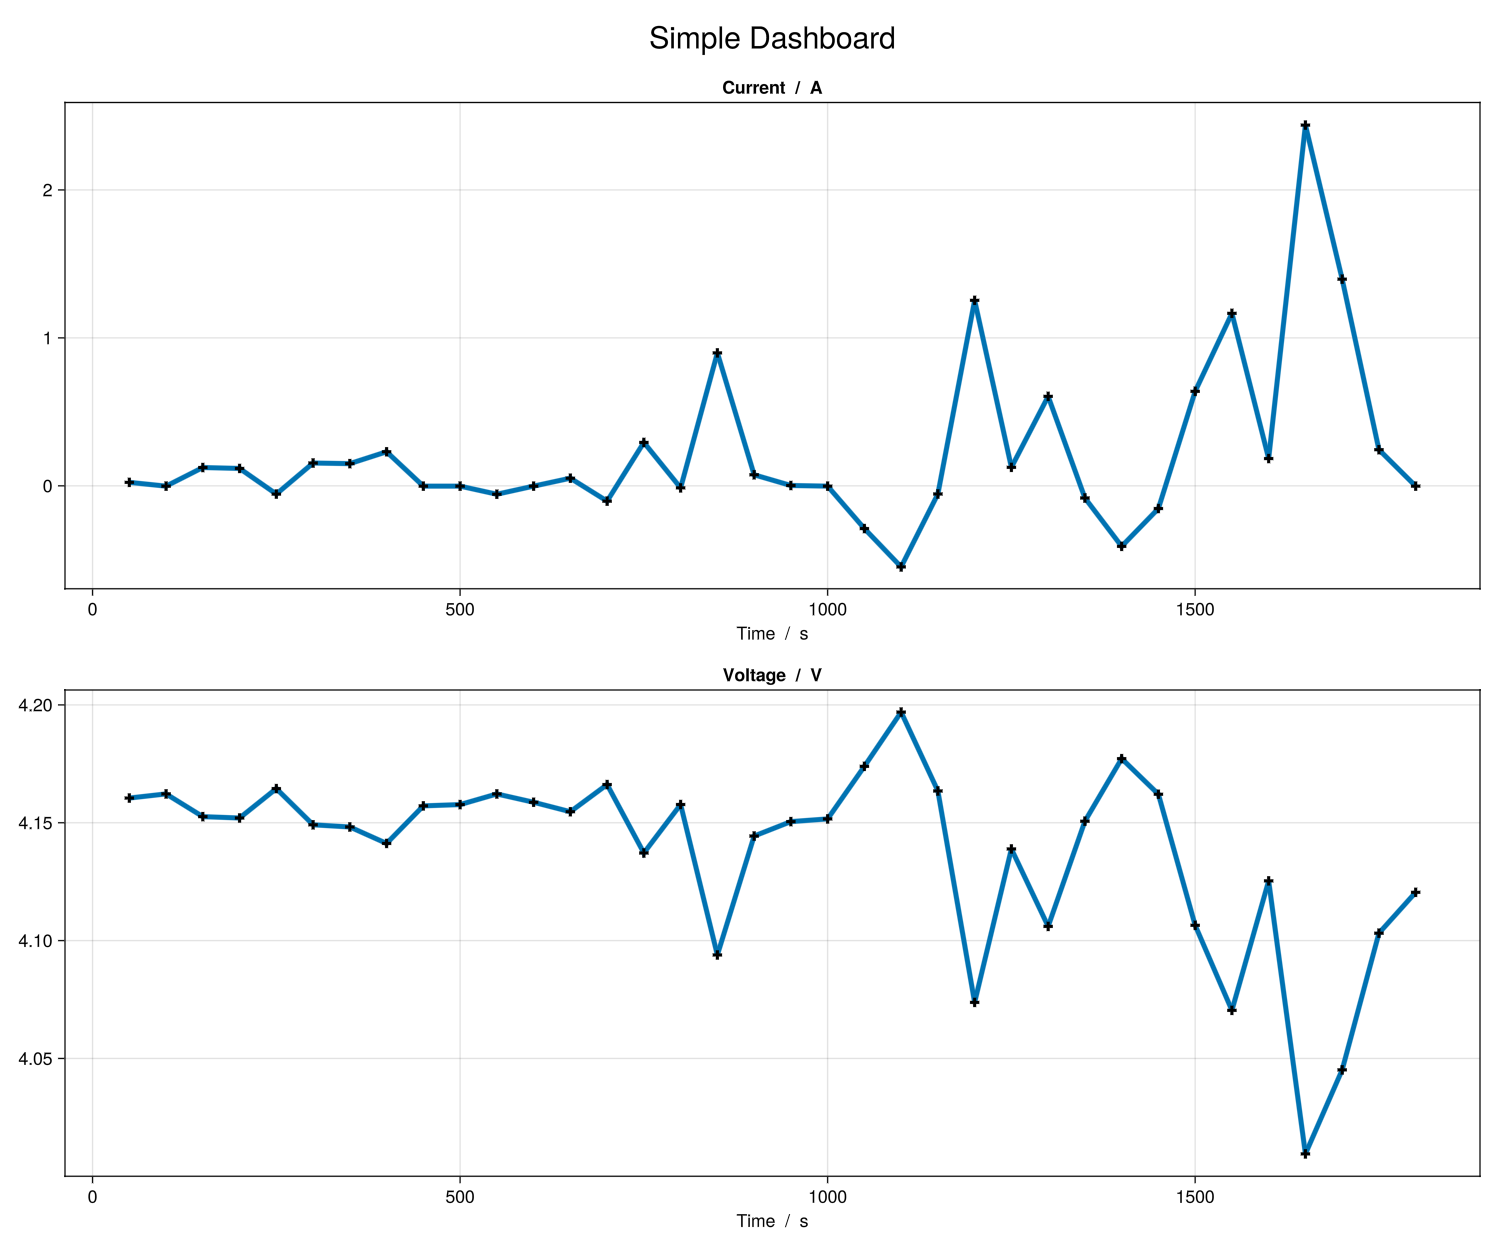

In [19]:

cell_parameters = load_cell_parameters(; from_file_path = "default_sets/cell_parameters/Chen2020.json")
cycling_protocol = load_cycling_protocol(; from_file_path= "default_sets/cycling_protocols/wltp_protocol.json")

model_setup = LithiumIonBattery()

sim = Simulation(model_setup, cell_parameters, cycling_protocol);

output = solve(sim);

plot_dashboard(output)

We can see that the output curves don't look smooth at all. Probably our time resolution isn't small enough. Let's look into changing the simulation setting that determines this. We can print the time related settings to find the right setting that we need to alter.

In [20]:
print_setting_info("time")

ℹ️  Setting Information
🔹 Name:         	TimeStepDuration
🔹 Description:		Duration of each time step in simulations
🔹 Type:         	Real
🔹 Unit:         	s
🔹 Minimum value:      	1
🔹 Maximum value:      	500
🔹 Documentation:	-
🔹 Ontology link:	[visit](https://w3id.org/emmo/domain/electrochemistry#electrochemistry_85e39686_9658_4c74_bb91_a935704c174a)


ℹ️  Setting Information
🔹 Name:         	RampUpTime
🔹 Description:		Ramp up time duration applied to initialize the cell simulation.
🔹 Type:         	Int64
🔹 Unit:         	s
🔹 Minimum value:      	0
🔹 Maximum value:      	500
🔹 Documentation:	-
🔹 Ontology link:	-



We can see that the time step duration is the one we need. Until now, we have only used the default simulation settings. Let's see what the default value of the "TimeStepDuration" is.

In [21]:
sim.simulation_settings["TimeStepDuration"]

50

It is equal to 50 seconds. Let's refine the time resolution and set it to 1 second. We need to load the default simulation settings first.

In [22]:
simulation_settings = load_simulation_settings(; from_file_path = "default_sets/simulation_settings/P2D.json")
simulation_settings["TimeStepDuration"] = 1

1

We can pass the simulation settings to the Simulation object and run the new simulation.

✔️ Validation of CellParameters passed: No issues found.
──────────────────────────────────────────────────
✔️ Validation of CyclingProtocol passed: No issues found.
──────────────────────────────────────────────────
✔️ Validation of SimulationSettings passed: No issues found.
──────────────────────────────────────────────────
Jutul: Simulating 30 minutes as 1800 report steps


Progress   3%|██                                         |  ETA: 0:00:05

Progress   5%|███                                        |  ETA: 0:00:06

Progress   8%|████                                       |  ETA: 0:00:05

Progress  10%|█████                                      |  ETA: 0:00:05

Progress  12%|██████                                     |  ETA: 0:00:05

Progress  14%|███████                                    |  ETA: 0:00:05

Progress  16%|███████                                    |  ETA: 0:00:05

Progress  17%|████████                                   |  ETA: 0:00:05

Progress  19%|█████████                                  |  ETA: 0:00:05

Progress  21%|██████████                                 |  ETA: 0:00:05

Progress  24%|███████████                                |  ETA: 0:00:05

Progress  26%|████████████                               |  ETA: 0:00:04

Progress  30%|█████████████                              |  ETA: 0:00:04

Progress  33%|███████████████         

╭────────────────┬────────────┬────────────────┬──────────╮
│ Iteration type │   Avg/step │   Avg/ministep │    Total │
│                │ 1800 steps │ 1800 ministeps │ (wasted) │
├────────────────┼────────────┼────────────────┼──────────┤
│ Newton         │    2.70444 │        2.70444 │ 4868 (0) │
│ Linearization  │    3.70444 │        3.70444 │ 6668 (0) │
│ Linear solver  │    2.70444 │        2.70444 │ 4868 (0) │
│ Precond apply  │        0.0 │            0.0 │    0 (0) │
╰────────────────┴────────────┴────────────────┴──────────╯
╭───────────────┬────────┬────────────┬────────╮
│ Timing type   │   Each │   Relative │  Total │
│               │     ms │ Percentage │      s │
├───────────────┼────────┼────────────┼────────┤
│ Properties    │ 0.0668 │     4.77 % │ 0.3251 │
│ Equations     │ 0.2522 │    24.68 % │ 1.6820 │
│ Assembly      │ 0.0949 │     9.28 % │ 0.6325 │
│ Linear solve  │ 0.5888 │    42.05 % │ 2.8663 │
│ Linear setup  │ 0.0000 │     0.00 % │ 0.0000 │
│ Precond apply │ 0

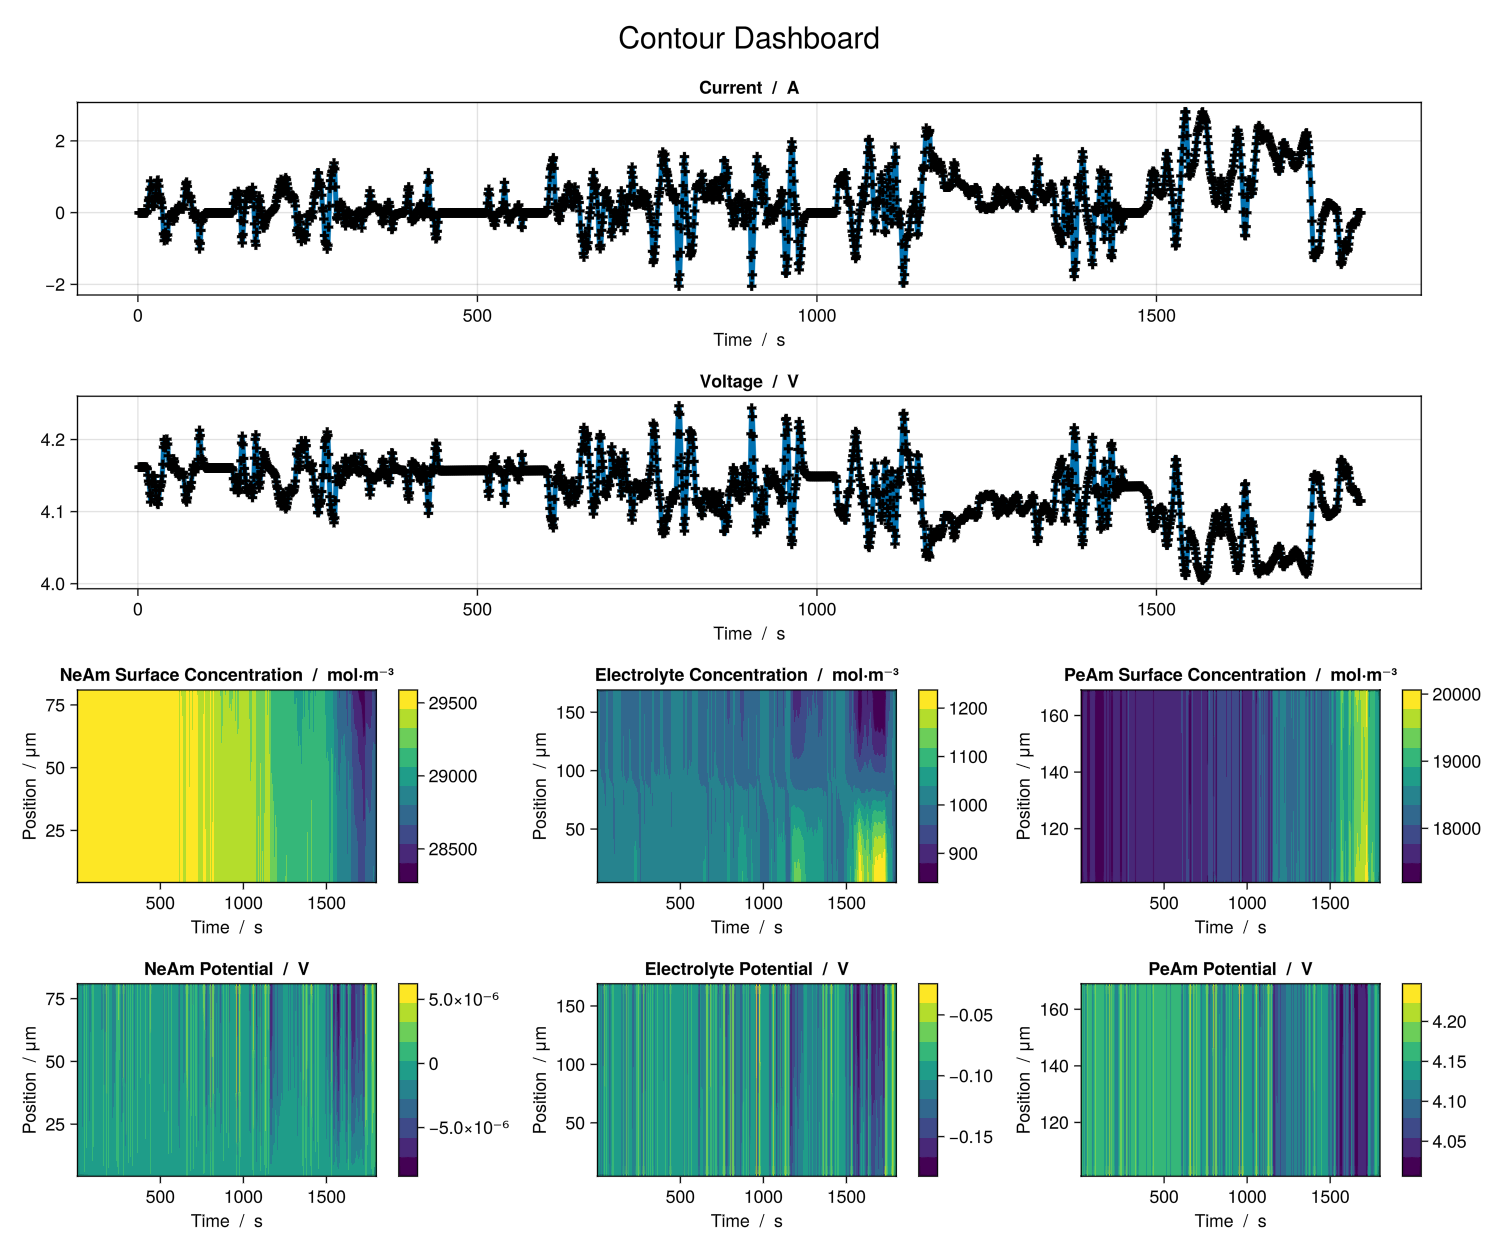

In [24]:
sim = Simulation(model_setup, cell_parameters, cycling_protocol; simulation_settings);

output = solve(sim);

plot_dashboard(output; plot_type = "contour")

## Part 3 - Electrode balancing

In this tutorial, we will study the effects that electrode thicknesses have over the power delivered by a cell. Power capability is usually determined from the
loss in capacity when cycling the cell at higher rates. We will compare the effects of thickness on the power delivery of a cell. Let's load some default parameter sets and model settings.

In [ ]:
cell_parameters = load_cell_parameters(; from_file_path = "default_sets/cell_parameters/Chen2020.json")
cc_discharge_protocol = load_cycling_protocol(; from_file_path = "default_sets/cycling_protocols/CCDischarge.json")

model_setup = LithiumIonBattery()

We will change the thickness of the positive electrode, and evaluate the cell capacity at different CRates. Lets define the DRates to use and the range of thicknesses to explore.

In [ ]:
d_rates = [0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 2.5]
thicknesses = range(8.0e-5, 11.0e-5, length = 9)

Now we loop through both DRates and thicknesses to run a simulation for each combination. For each simulation, we will calculate the discharge capacity, and store it for plotting.

In [ ]:
power_rates = []
np_ratios = []

for thickness in thicknesses

	capacities = []
	
	cell_parameters["NegativeElectrode"]["ElectrodeCoating"]["Thickness"] = thickness
	n_to_p_ratio = compute_np_ratio(cell_parameters)
	push!(np_ratios, n_to_p_ratio)

	for d_rate in d_rates

		cc_discharge_protocol["DRate"] = d_rate
		sim = Simulation(model_setup, cell_parameters, cc_discharge_protocol)
		print("###### Simulation of thickness $thickness | d_rate $d_rate #########")
		output = solve(sim; end_report = false)

		if length(output[:states]) > 0 # if simulation is successful
			discharge_capacity = compute_discharge_capacity(output)
			push!(capacities, discharge_capacity)
		else
			push!(capacities, 0.0)
		end
	end
	push!(power_rates, (thickness = thickness, d_rates = d_rates, capacities = capacities, np_ratios = n_to_p_ratio))
end

Now we plot capacities vs Drate at different thicknesses of the negative electrode:

In [ ]:
fig = Figure(size = (1000, 400))
ax = Axis(fig[1, 1], title = "Power capability vs Thickness of Negative Electrode",
          xlabel = "DRate", ylabel = "Capacity  /  Ah")

for experiment in power_rates
    label_str = lowercase(string(experiment.thickness*10^6))  # Scientific notation as string
    lines!(ax, experiment.d_rates, experiment.capacities, label = label_str)
end

fig[1, 2] = Legend(fig, ax, "Thicknesses /  μm", framevisible = false)
fig


In [ ]:
fig = Figure(size = (1000, 400))
ax = Axis(fig[1, 1], title = "Power capability vs Thickness of Negative Electrode",
          xlabel = "DRate", ylabel = "Capacity  /  Ah")

for experiment in power_rates
    label_str = lowercase(string(experiment.np_ratios))  # Scientific notation as string
    lines!(ax, experiment.d_rates, experiment.capacities, label = label_str)
end

fig[1, 2] = Legend(fig, ax, "N/P ratio", framevisible = false)
fig

## Part 4 - Rate capability

In this part we will compare the effect that the reaction rate values have on cell performance. Lets start again with loading some pre-defined cell parameters and cycling protocols.

In [ ]:
cell_parameters = load_cell_parameters(; from_file_path = "default_sets/cell_parameters/Chen2020.json")
cycling_protocol = load_cycling_protocol(; from_file_path = "default_sets/cycling_protocols/CCDischarge.json")

model_setup = LithiumIonBattery()

First lets see the effect that the reaction rate of the negative electrode has on cell performance. To do this, we simply loop through
a list of parameter values, carry a simulation for each value, store the outputs, and compare the voltage curves for every output.
We use the logarithm of the reaction rates to change their values by orders of magnitude.

In [ ]:
log_rate_start = -3.0
log_rate_stop = -13.0

outputs_rate = []
for r in range(log_rate_start, log_rate_stop, length = 10)
	cell_parameters["NegativeElectrode"]["ActiveMaterial"]["ReactionRateConstant"] = 10^r
	sim = Simulation(model_setup, cell_parameters, cycling_protocol)
	result = solve(sim; config_kwargs = (; end_report = false))
	push!(outputs_rate, (r = r, output = result))  # store r together with output
end

Now, plot the discharge curves for each reaction rate:

In [ ]:
fig = Figure()
ax = Axis(fig[1, 1], ylabel = "Voltage / V", xlabel = "Time / s", title = "Discharge curve")

for data in outputs_rate
	time_series = get_output_time_series(data.output)
	t = time_series[:Time]
	E = time_series[:Voltage]
	label_str = lowercase(string(10^data.r))
	lines!(ax, t, E, label = label_str)
end

fig[1, 2] = Legend(fig, ax, "Reaction rate", framevisible = false)
fig

Sweeping reaction rates result in interesting behavior of the cells voltage and capacity. High reaction rates have negligible influence 
on the cell voltage curve. However, values below 1e-10 result in a noticeable difference on the curves and the cell's capacity. 
This observations might be attributed to the interplay between Li+ diffusion and reaction processes. For high reaction rates, 
the limiting Li+ transport step might be diffusing Li+ from/to the electrodes. However, below a threshold value, the reaction kinetics 
becomes the bottleneck step in Li+ transport, thus contributing significantly to the cell's overpotential. 

Lets now see the effect that the diffusion coefficient of the positive electrode has on cell performance. We first set the reaction rate 
to the original value in the parameter set, and then follow the same procedure as above.

In [ ]:
cell_parameters["NegativeElectrode"]["ActiveMaterial"]["ReactionRateConstant"] = 1.0e-13

log_D_start = -10.0
log_D_stop = -15.0

outputs_diff = []

for d in range(log_D_start, log_D_stop, length = 10)
	cell_parameters["PositiveElectrode"]["ActiveMaterial"]["DiffusionCoefficient"] = 10^d
	sim = Simulation(model_setup, cell_parameters, cycling_protocol)
	result = solve(sim; config_kwargs = (; end_report = false))
	push!(outputs_diff, (d = d, output = result))  # store r together with output
end


fig1 = Figure()
ax1 = Axis(fig1[1, 1], ylabel = "Voltage / V", xlabel = "Time / s", title = "Discharge curve")

for data in outputs_diff
	if length(data.output[:states]) > 0 #if simulation is successful
		time_series = get_output_time_series(data.output)
		t = time_series[:Time]
		E = time_series[:Voltage]
		label_str = lowercase(string(10^data.d))
		lines!(ax1, t, E, label = label_str)
	end
end

fig1[1, 2] = Legend(fig1, ax1, "Diffusion Coefficient", framevisible = false)
fig1

Diffusion coefficients, just as reaction rates, have also a non-linear effect on the cells voltage and capacity. Diffusion coefficients down to 5e-14  have negligible influence on the cell voltage curve. However, as the coefficients fall below 5e-14 they start to influence the curves and the cell's capacity in a noticeable way. The effect becomes more pronounced at lower values. As with reaction rates, these observations might originate from the interplay between Li+ diffusion and reaction processes, where the cell's overpotential responds to the transport limiting step.